##assignment-4

##Train model using tf.GradientTape() and model.fit()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


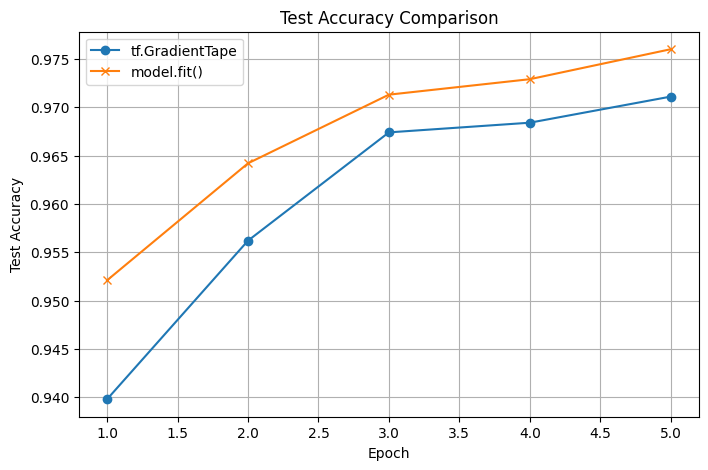

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 784).astype("float32") / 255
x_test = x_test.reshape(-1, 784).astype("float32") / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

def build_model():
    return tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(10)
    ])

# GradientTape Training
model_tape = build_model()
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()
epochs = 5
batch_size = 128
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train_cat)).batch(batch_size)
tape_accuracies = []

for epoch in range(epochs):
    for x_batch, y_batch in train_dataset:
        with tf.GradientTape() as tape:
            logits = model_tape(x_batch, training=True)
            loss = loss_fn(y_batch, logits)
        grads = tape.gradient(loss, model_tape.trainable_weights)
        optimizer.apply_gradients(zip(grads, model_tape.trainable_weights))
    preds = model_tape(x_test)
    acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(preds, axis=1), tf.argmax(y_test_cat, axis=1)), tf.float32)).numpy()
    tape_accuracies.append(acc)

# model.fit Training
model_fit = build_model()
model_fit.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model_fit.fit(x_train, y_train_cat, epochs=5, batch_size=128, validation_data=(x_test, y_test_cat), verbose=0)
fit_accuracies = history.history['val_accuracy']

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), tape_accuracies, label='tf.GradientTape', marker='o')
plt.plot(range(1, epochs + 1), fit_accuracies, label='model.fit()', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()


##Update 2-> 3-> 4-> 3-> 10 layers

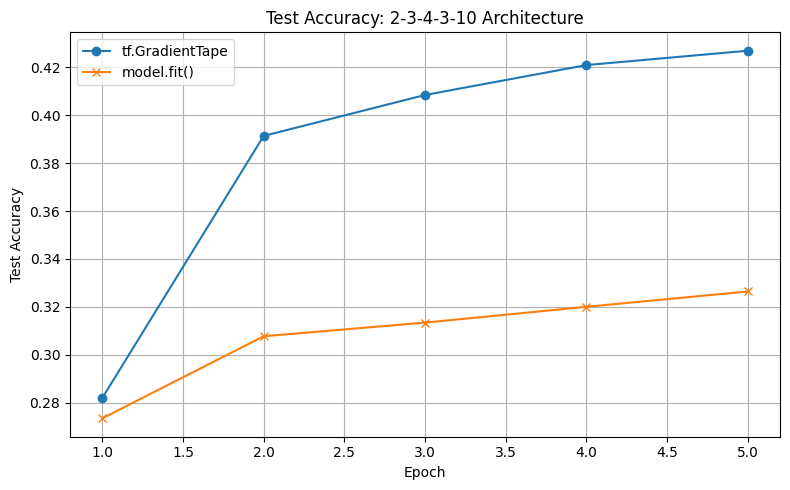

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA

# Load MNIST and reduce input dimensions to 2
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 784).astype("float32") / 255
x_test = x_test.reshape(-1, 784).astype("float32") / 255

# PCA to reduce to 2D input
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Model with layers: 2 -> 3 -> 4 -> 3 -> 10
def build_model():
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape=(2,)),         # Input: 2 neurons
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(10)                 # Output: 10 classes (logits)
    ])

# ========== Train with tf.GradientTape ==========
model_tape = build_model()
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()
epochs = 5
batch_size = 128
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_pca, y_train_cat)).batch(batch_size)
tape_accuracies = []

for epoch in range(epochs):
    for x_batch, y_batch in train_dataset:
        with tf.GradientTape() as tape:
            logits = model_tape(x_batch, training=True)
            loss = loss_fn(y_batch, logits)
        grads = tape.gradient(loss, model_tape.trainable_weights)
        optimizer.apply_gradients(zip(grads, model_tape.trainable_weights))
    preds = model_tape(x_test_pca)
    acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(preds, axis=1), tf.argmax(y_test_cat, axis=1)), tf.float32)).numpy()
    tape_accuracies.append(acc)

# ========== Train with model.fit ==========
model_fit = build_model()
model_fit.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model_fit.fit(x_train_pca, y_train_cat, batch_size=128, epochs=5, validation_data=(x_test_pca, y_test_cat), verbose=0)
fit_accuracies = history.history['val_accuracy']

# ========== Plot comparison ==========
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), tape_accuracies, label='tf.GradientTape', marker='o')
plt.plot(range(1, epochs + 1), fit_accuracies, label='model.fit()', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy: 2-3-4-3-10 Architecture')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##Update 2-> 3-> 4-> 3-> 1

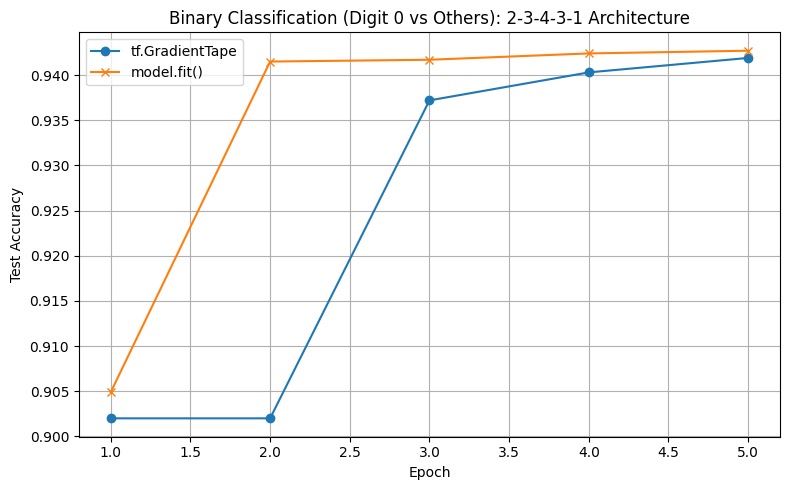

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA

# Load and preprocess MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 784).astype("float32") / 255
x_test = x_test.reshape(-1, 784).astype("float32") / 255

# Reduce to 2D input using PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Convert to binary classification: 1 if digit == 0, else 0
y_train_bin = (y_train == 0).astype("float32")
y_test_bin = (y_test == 0).astype("float32")

# Model: 2-3-4-3-1 with sigmoid at output
def build_binary_model():
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # single output with sigmoid
    ])

# ========== Train with tf.GradientTape ==========
model_tape = build_binary_model()
loss_fn = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam()
epochs = 5
batch_size = 128
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_pca, y_train_bin)).batch(batch_size)
tape_accuracies = []

for epoch in range(epochs):
    for x_batch, y_batch in train_dataset:
        with tf.GradientTape() as tape:
            preds = model_tape(x_batch, training=True)
            loss = loss_fn(y_batch, preds)
        grads = tape.gradient(loss, model_tape.trainable_weights)
        optimizer.apply_gradients(zip(grads, model_tape.trainable_weights))

    # Evaluate
    test_preds = model_tape(x_test_pca)
    test_labels = tf.cast(tf.reshape(y_test_bin, [-1, 1]), tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.round(test_preds), test_labels), tf.float32)).numpy()
    tape_accuracies.append(accuracy)

# ========== Train with model.fit ==========
model_fit = build_binary_model()
model_fit.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_fit.fit(x_train_pca, y_train_bin, batch_size=128, epochs=5, validation_data=(x_test_pca, y_test_bin), verbose=0)
fit_accuracies = history.history['val_accuracy']

# ========== Plot comparison ==========
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), tape_accuracies, label='tf.GradientTape', marker='o')
plt.plot(range(1, epochs + 1), fit_accuracies, label='model.fit()', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Binary Classification (Digit 0 vs Others): 2-3-4-3-1 Architecture')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
